### E-commerce Customer Behavior Dataset

In [474]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import date
%matplotlib inline

In [475]:
data = pd.read_csv('C:/Users/GT MALL/Desktop/E-commerce Customer Behavior.csv')

In [476]:
data.head()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


### Exploratory Data Analysis

##### <div align="center">  Data Description </div>  

| Column Name        | Description                    |
|--------------------|--------------------------------|
| Customer ID        | A unique identifier assigned to each customer, ensuring distinction across the dataset. |
| Gender             | Specifies the gender of the customer, allowing for gender-based analytics. |
| Age                | Represents the age of the customer, enabling age-group-specific insights. |
| City               | Indicates the city of residence for each customer, providing geographic insights. |
| Membership Type    | Identifies the type of membership held by the customer, influencing perks and benefits. |
| Total Spend        | Records the total monetary expenditure by the customer on the e-commerce platform. |
| Items Purchased    | Quantifies the total number of items purchased by the customer. |
| Average Rating     | Represents the average rating given by the customer for purchased items, gauging satisfaction. |
| Discount Applied   | Indicates whether a discount was applied to the customer's purchase, influencing buying behavior. |
| Days Since Last Purchase | Reflects the number of days elapsed since the customer's most recent purchase, aiding in retention analysis. |
| Satisfaction Level | Captures the overall satisfaction level of the customer, providing a subjective measure of their experience. |

In [477]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               350 non-null    int64  
 1   Gender                    350 non-null    object 
 2   Age                       350 non-null    int64  
 3   City                      350 non-null    object 
 4   Membership Type           350 non-null    object 
 5   Total Spend               350 non-null    float64
 6   Items Purchased           350 non-null    int64  
 7   Average Rating            350 non-null    float64
 8   Discount Applied          350 non-null    bool   
 9   Days Since Last Purchase  350 non-null    int64  
 10  Satisfaction Level        348 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 27.8+ KB


In [478]:
data['Gender'] = data['Gender'].astype('category')
data['City'] = data['City'].astype('category')
data['Customer ID'] = data['Customer ID'].astype('O')

In [479]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Customer ID               350 non-null    object  
 1   Gender                    350 non-null    category
 2   Age                       350 non-null    int64   
 3   City                      350 non-null    category
 4   Membership Type           350 non-null    object  
 5   Total Spend               350 non-null    float64 
 6   Items Purchased           350 non-null    int64   
 7   Average Rating            350 non-null    float64 
 8   Discount Applied          350 non-null    bool    
 9   Days Since Last Purchase  350 non-null    int64   
 10  Satisfaction Level        348 non-null    object  
dtypes: bool(1), category(2), float64(2), int64(3), object(3)
memory usage: 23.4+ KB


In [480]:
data.describe()

,Age,Total Spend,Items Purchased,Average Rating,Days Since Last Purchase
count,350.000000,350.000000,350.000000,350.000000,350.000000
mean,33.597143,845.381714,12.600000,4.019143,26.588571
std,4.870882,362.058695,4.155984,0.580539,13.440813
min,26.000000,410.800000,7.000000,3.000000,9.000000
25%,30.000000,502.000000,9.000000,3.500000,15.000000
50%,32.500000,775.200000,12.000000,4.100000,23.000000
75%,37.000000,1160.600000,15.000000,4.500000,38.000000
max,43.000000,1520.100000,21.000000,4.900000,63.000000


In [481]:
data.describe(include=['object', 'category', 'bool'])


,Customer ID,Gender,City,Membership Type,Discount Applied,Satisfaction Level
count,350,350,350,350,350,348
unique,350,2,6,3,2,3
top,101,Female,Los Angeles,Gold,True,Satisfied
freq,1,175,59,117,175,125


### 1.Dealing with NAs

In [482]:
data_nas = pd.DataFrame(data.isna().sum(), columns=['Number of NAs'])
data_nas['Percentage of NAs'] = round(data_nas['Number of NAs'] / data.shape[0] *100, 3)
data_nas

,Number of NAs,Percentage of NAs
Customer ID,0,0.000
Gender,0,0.000
Age,0,0.000
City,0,0.000
Membership Type,0,0.000
Total Spend,0,0.000
Items Purchased,0,0.000
Average Rating,0,0.000
Discount Applied,0,0.000
Days Since Last Purchase,0,0.000


In [483]:
data.dropna(subset=['Satisfaction Level'], inplace=True)

In [484]:
data.shape

(348, 11)

### Visualizations

In [485]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#### Items Purchased by City

In [486]:
data['Items Purchased'].describe()

count    348.000000
mean      12.632184
std        4.146079
min        7.000000
25%        9.000000
50%       12.000000
75%       15.000000
max       21.000000
Name: Items Purchased, dtype: float64

In [487]:
data['City'].describe()

count             348
unique              6
top       Los Angeles
freq               59
Name: City, dtype: object

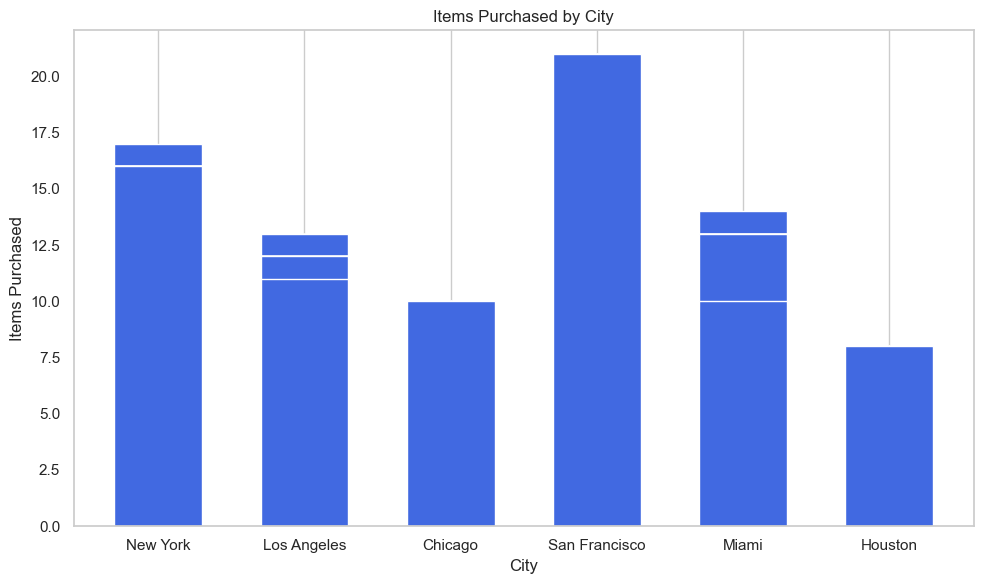

In [488]:
plt.figure(figsize=(10, 6))
plt.bar(data['City'], data['Items Purchased'], color='royalblue', width=0.6)
plt.title('Items Purchased by City')
plt.xlabel('City')
plt.ylabel('Items Purchased')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='', alpha=0.7)
plt.tight_layout()
plt.show()


The orders were from 6 states of the USA. The most orders were from San Francisco

In [491]:
data = pd.DataFrame(data)

fig = px.scatter_geo(data, lat='lat', lon='lon', hover_name='City', color='State',
                     projection='natural earth', title='Cities Colored by States')
fig.update_geos(
    showcountries=False, showcoastlines=True, showland=True, showrivers=True
)
fig.update_geos(
    lonaxis_range=[-160, -50], 
    lataxis_range=[0, 80]        
)

fig.show()



ValueError: Value of 'lat' is not the name of a column in 'data_frame'. Expected one of ['Customer ID', 'Gender', 'Age', 'City', 'Membership Type', 'Total Spend', 'Items Purchased', 'Average Rating', 'Discount Applied', 'Days Since Last Purchase', 'Satisfaction Level'] but received: lat

### Number of orders by gender to understand who is making more orders.

Our preliminary knowledge that men tend to shop more frequently than women online, on Amazon, and at Walmart.com, on a daily and weekly basis. Women, by contrast, tend to shop between one and four times a month online (51%), on Amazon (54%), and on Walmart.com (50%). Sub: that here again men have done more orders


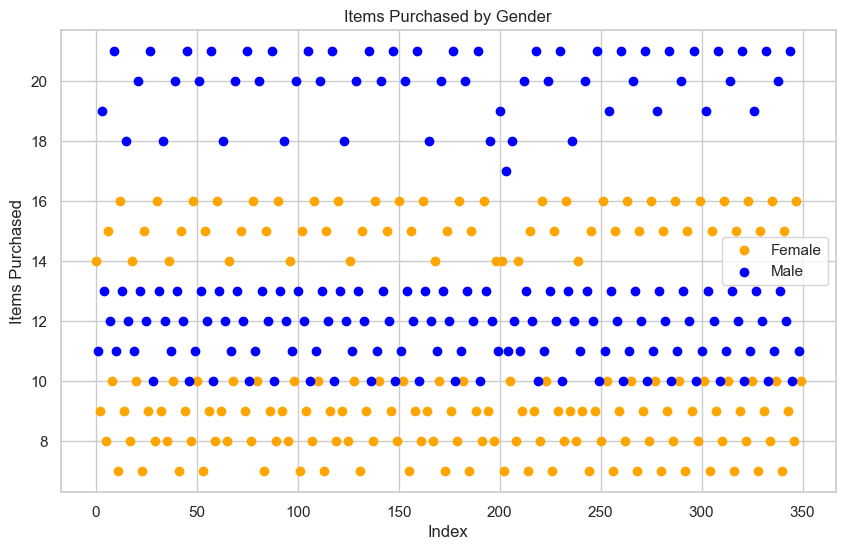

In [490]:
data = pd.DataFrame(data)

plt.figure(figsize=(10, 6))
colors = {'Male': 'blue', 'Female': 'Orange'}
for gender, group in data.groupby('Gender'):
    plt.scatter(group.index, group['Items Purchased'], label=gender, color=colors[gender])

plt.title('Items Purchased by Gender')
plt.xlabel('Index')
plt.ylabel('Items Purchased')

plt.legend()
plt.grid(True)
plt.show()



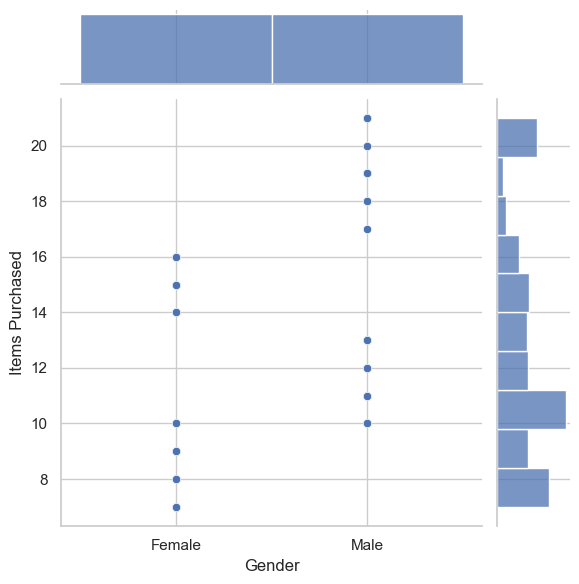

In [458]:
sns.jointplot(x='Gender', y='Items Purchased', data=data)

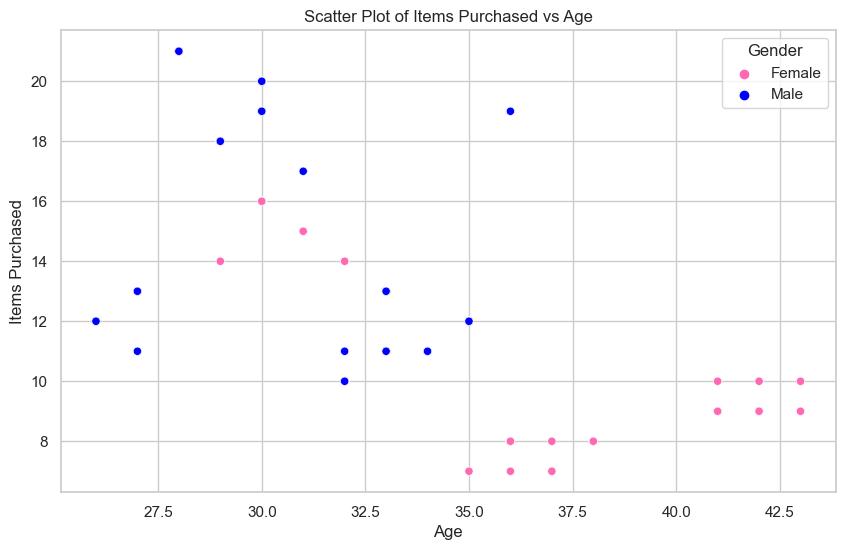

In [456]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Items Purchased', hue='Gender', data=data, palette={'Male': 'blue', 'Female': 'hotpink'})
plt.xlabel('Age')
plt.ylabel('Items Purchased')
plt.title('Scatter Plot of Items Purchased vs Age')
plt.legend(title='Gender')
plt.show()



In the age group above 35, orders were made by women.

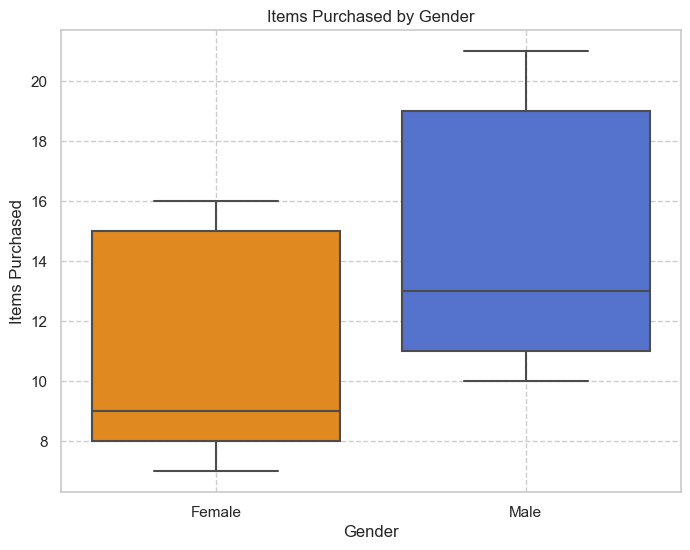

In [463]:
data = pd.DataFrame(data)

palette = {'Male': 'royalblue', 'Female': 'darkorange'}

# Create the boxplot with customized colors
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Items Purchased', data=data, palette=palette)

# Add labels and title
plt.title('Items Purchased by Gender')
plt.xlabel('Gender')
plt.ylabel('Items Purchased')

# Show plot
plt.grid(linestyle='--')
plt.show()


Most ordering customers are male.

### Relation between Age , Item Purchase and Total Spend

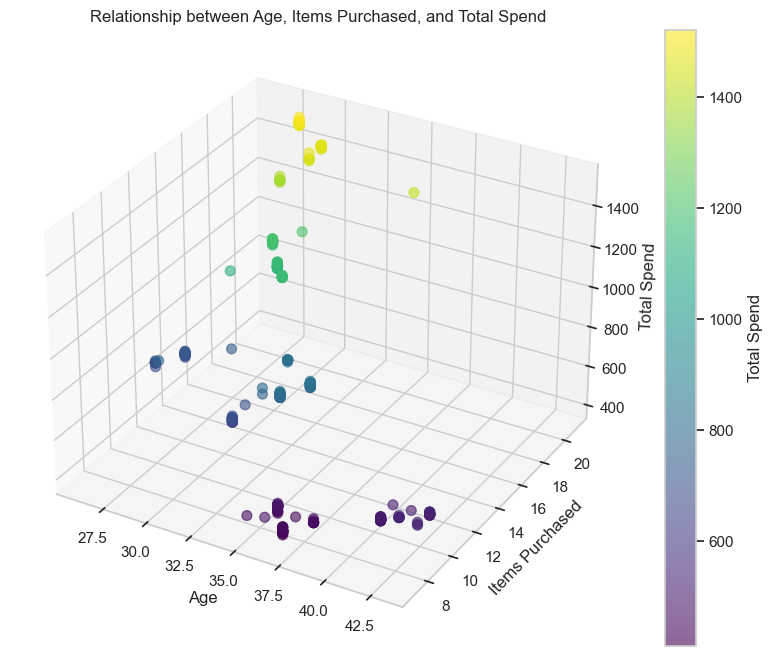

In [459]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')


x = data['Age']
y = data['Items Purchased']
z = data['Total Spend']

scatter = ax.scatter(x, y, z, c=z, cmap='viridis', s=50, alpha=0.6)

ax.set_xlabel('Age')
ax.set_ylabel('Items Purchased')
ax.set_zlabel('Total Spend')
ax.set_title('Relationship between Age, Items Purchased, and Total Spend')

cbar = fig.colorbar(scatter, ax=ax)
cbar.set_label('Total Spend')

plt.show()


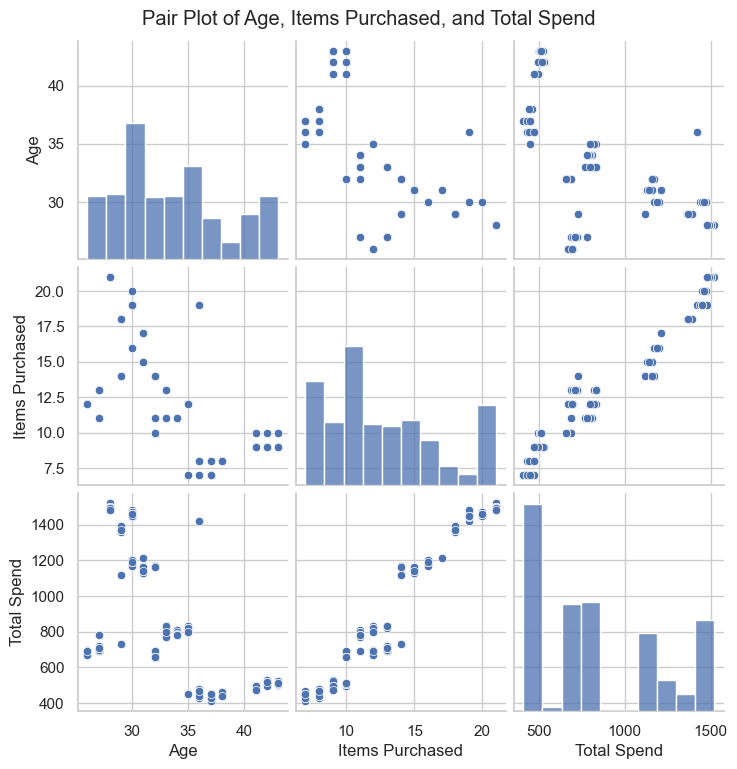

In [460]:
import seaborn as sns
pairplot_data = data[['Age', 'Items Purchased', 'Total Spend']]

sns.pairplot(pairplot_data)
plt.suptitle('Pair Plot of Age, Items Purchased, and Total Spend', y=1.02)
plt.show()


People aged 26-45 use the platform, those under 32 place the most orders and the total value of their orders is higher.

### Regression Analyse

Suppose a discount has a big impact on purchases

In [464]:
data['Discount Applied'] = data['Discount Applied'].astype(int)
data['Gender'] = data['Gender'].cat.codes

In [465]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 348 entries, 0 to 349
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Customer ID               348 non-null    object  
 1   Gender                    348 non-null    int8    
 2   Age                       348 non-null    int64   
 3   City                      348 non-null    category
 4   Membership Type           348 non-null    object  
 5   Total Spend               348 non-null    float64 
 6   Items Purchased           348 non-null    int64   
 7   Average Rating            348 non-null    float64 
 8   Discount Applied          348 non-null    int32   
 9   Days Since Last Purchase  348 non-null    int64   
 10  Satisfaction Level        348 non-null    object  
dtypes: category(1), float64(2), int32(1), int64(3), int8(1), object(3)
memory usage: 26.7+ KB


In [466]:
import statsmodels.api as sm
X = data[['Gender','Age','Discount Applied']]
y = data['Items Purchased']

X = sm.add_constant(X)

mod1 = sm.OLS(y,X)
res1 = mod1.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Items Purchased   R-squared:                       0.475
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                     103.9
Date:                Thu, 11 Apr 2024   Prob (F-statistic):           6.53e-48
Time:                        23:47:34   Log-Likelihood:                -875.94
No. Observations:                 348   AIC:                             1760.
Df Residuals:                     344   BIC:                             1775.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               31.7586      1.589     19.985      0.000      28.633      34.884
Gender               0.2318      0.430      0.539      0.590      -0.614       1.078
Age                 -0.5641      0.042    -13.591      0.000      -0.646      -0.482
Discount Applied    -0.6022      0.350     -1.719      0.087      -1.291       0.087
==============================================================================
Omnibus:                      161.550   Durbin-Watson:                   2.181
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.804
Skew:                           0.135   Prob(JB):                     3.04e-05
Kurtosis:                       1.833   Cond. No.                         341.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [467]:
# Convert 'City' variable into dummy variables
city_dummies = pd.get_dummies(data['City'], prefix='City', drop_first=True)

# Concatenate the dummy variables with the original dataframe
data_with_dummies = pd.concat([data, city_dummies], axis=1)

# Define the independent variables (including the dummy variables)
X = data_with_dummies[['Gender', 'Age', 'Discount Applied'] + list(city_dummies.columns)]

# Define the dependent variable
y = data_with_dummies['Items Purchased']

# Add constant to the independent variables
X = sm.add_constant(X)

# Fit the regression model
mod = sm.OLS(y, X)
res = mod.fit()

# Print the summary of the regression results
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:        Items Purchased   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1474.
Date:                Thu, 11 Apr 2024   Prob (F-statistic):          4.84e-250
Time:                        23:47:35   Log-Likelihood:                -388.77
No. Observations:                 348   AIC:                             793.5
Df Residuals:                     340   BIC:                             824.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 19.4998      0

In [468]:
data['Discount Applied'] = data['Discount Applied'].astype(bool)

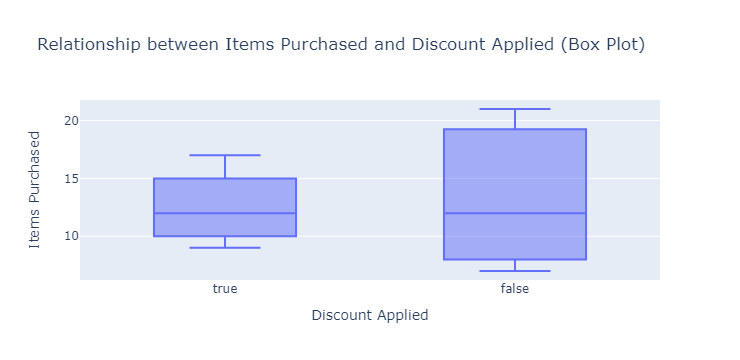

In [469]:

fig = px.box(data_frame=data, x='Discount Applied', y='Items Purchased', 
             title='Relationship between Items Purchased and Discount Applied (Box Plot)',
             labels={'Discount Applied': 'Discount Applied', 'Items Purchased': 'Items Purchased'})

# Show the plot
fig.show()



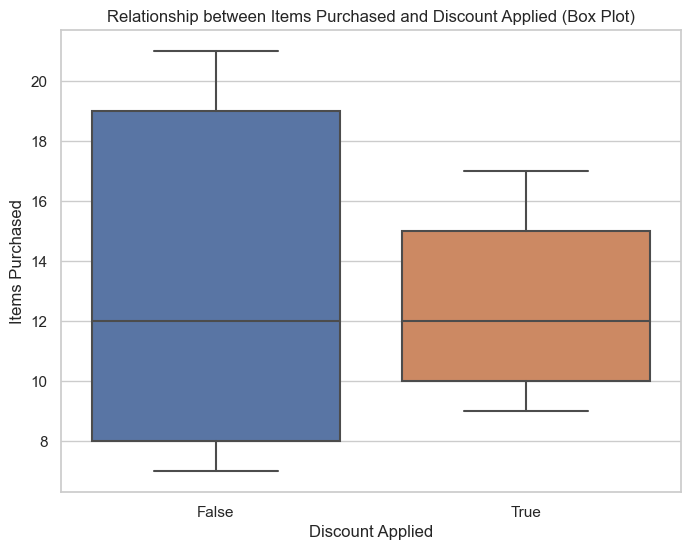

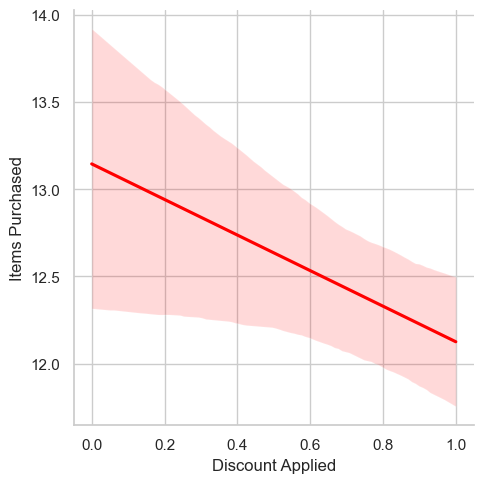

In [470]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Discount Applied', y='Items Purchased', data=data)
plt.title('Relationship between Items Purchased and Discount Applied (Box Plot)')
plt.xlabel('Discount Applied')
plt.ylabel('Items Purchased')

sns.lmplot(x='Discount Applied', y='Items Purchased', data=data, x_estimator=np.mean, scatter=False, line_kws={'color': 'red'})

plt.show()


In [471]:
data['CustomerID'] = range(1, len(data) + 1)

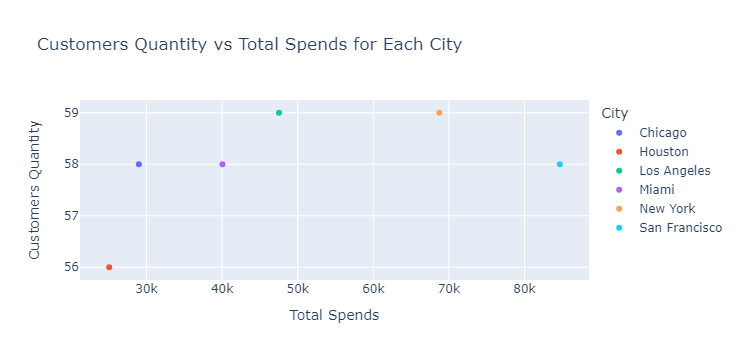

In [472]:
data = pd.DataFrame(data)

customers_quantity = data.groupby('City')['CustomerID'].count().reset_index()
customers_quantity.columns = ['City', 'CustomersQuantity']

total_spends = data.groupby('City')['Total Spend'].sum().reset_index()

city_data = pd.merge(customers_quantity, total_spends, on='City')

fig = px.scatter(city_data, x="Total Spend", y="CustomersQuantity", color="City",
                 title="Customers Quantity vs Total Spends for Each City",
                 labels={'Total Spend': 'Total Spends', 'CustomersQuantity': 'Customers Quantity'},
                 hover_name="City")

fig.show()



C:\Users\GT MALL\AppData\Local\Temp\ipykernel_7676\963597915.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



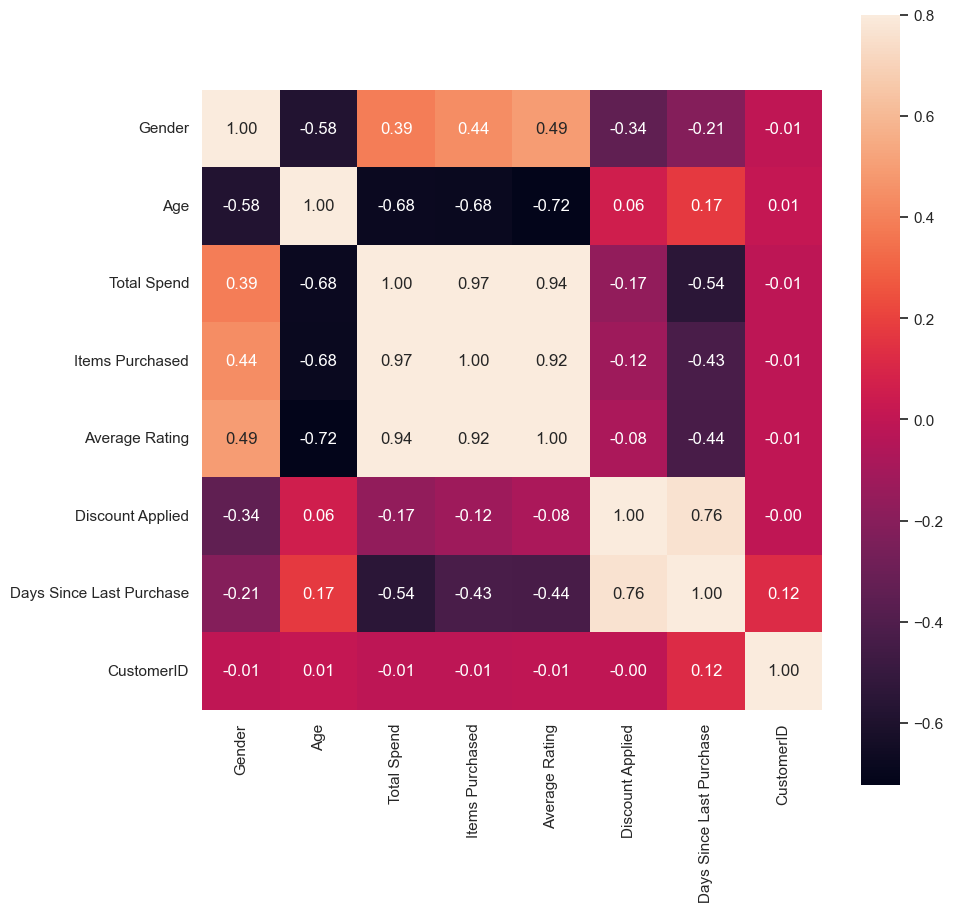

In [404]:
corrmat = data.corr()
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corrmat, vmax=.8, square=True, annot=True, fmt='.2f')
plt.show()

In [405]:
data['Satisfaction Level'] = data['Satisfaction Level'].astype('category')
data['Membership Type'] = data['Membership Type'].astype('category')

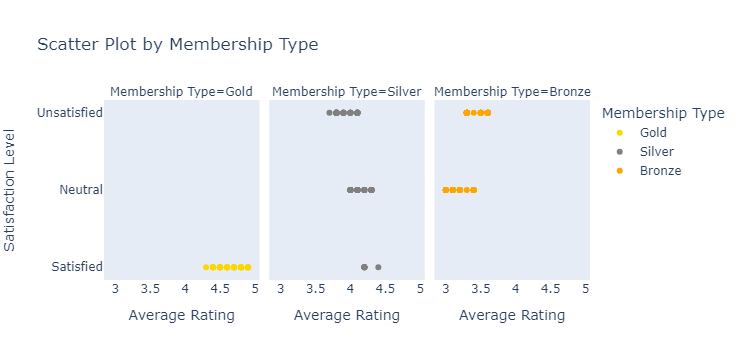

In [492]:
data = pd.DataFrame(data)
color_map = {'Gold': 'gold', 'Silver': 'grey', 'Bronze': 'orange'}

fig = px.scatter(data_frame=data, x="Average Rating", y="Satisfaction Level", color="Membership Type", 
                 facet_col="Membership Type", title="Scatter Plot by Membership Type",
                 color_discrete_map=color_map)
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()


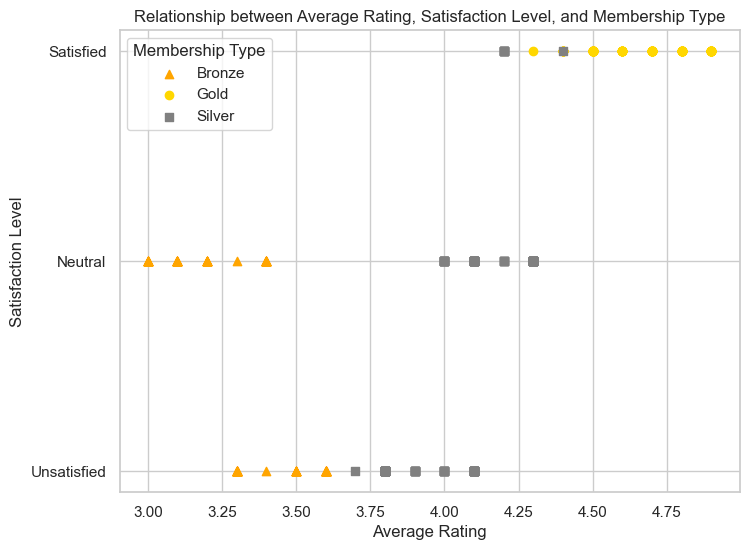

In [493]:
data = pd.DataFrame(data)

# Define colors for each membership type
color_map = {'Gold': 'gold', 'Silver': 'grey', 'Bronze': 'orange'}

# Define marker styles for each membership type
marker_styles = {'Gold': 'o', 'Silver': 's', 'Bronze': '^'}

# Plot
plt.figure(figsize=(8, 6))
for membership_type, group in data.groupby('Membership Type'):
    plt.scatter(group['Average Rating'], group['Satisfaction Level'], label=membership_type, marker=marker_styles[membership_type], c=color_map[membership_type])

plt.xlabel('Average Rating')
plt.ylabel('Satisfaction Level')
plt.title('Relationship between Average Rating, Satisfaction Level, and Membership Type')
plt.legend(title='Membership Type')
plt.grid(True)
plt.show()


Depending on membership type, customer satisfaction and ratings were lower, with Gold memberships giving the highest ratings․
